# Problem Statement -

You are a cab rental start up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot porject and have a requirement to apply for analytics for fare prediction. you need to desigh a system that predicts the fare amount for a cab ride in the city. 

# importing required libraries

In [151]:
import os #for input output operations
import pandas as pd #for manipulating datastructures and tabular data
import numpy as np
import matplotlib.pyplot as plt #for data visualization like histogram , linechart, barchart, heatmap
import seaborn as sns #for data visualization for interactive images
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Setting the working directory

In [4]:
os.chdir("C:/Users\ASHUTOSH\Desktop\edu-versity-Projects\Cab_Fare_Prediction")
print(os.getcwd())

C:\Users\ASHUTOSH\Desktop\edu-versity-Projects\Cab_Fare_Prediction


# loading the data

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.10,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
...,...,...,...,...,...,...,...,...
102822,2015-03-22 06:38:44.0000001,6.00,2015-03-22 06:38:44 UTC,-73.952019,40.824009,-73.940926,40.839195,1
102823,2014-07-30 18:12:21.0000007,5.50,2014-07-30 18:12:21 UTC,-73.953338,40.767686,-73.963136,40.775248,1
102824,2011-09-23 04:20:00.00000027,7.30,2011-09-23 04:20:00 UTC,-73.953740,40.779777,-73.940107,40.806462,1
102825,2013-12-03 21:35:05.0000003,5.00,2013-12-03 21:35:05 UTC,-73.986612,40.719474,-73.984908,40.728074,1


In [7]:
test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


# Understanding the data

In [8]:
train.head() #checking first five rows of the training dataset

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1


In [9]:
train.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
102822,2015-03-22 06:38:44.0000001,6.00,2015-03-22 06:38:44 UTC,-73.952019,40.824009,-73.940926,40.839195,1
102823,2014-07-30 18:12:21.0000007,5.50,2014-07-30 18:12:21 UTC,-73.953338,40.767686,-73.963136,40.775248,1
102824,2011-09-23 04:20:00.00000027,7.30,2011-09-23 04:20:00 UTC,-73.953740,40.779777,-73.940107,40.806462,1
102825,2013-12-03 21:35:05.0000003,5.00,2013-12-03 21:35:05 UTC,-73.986612,40.719474,-73.984908,40.728074,1
102826,2010-09-08 16:19:05.0000002,49.57,2010-09-08 16:19:05 UTC,-73.973255,40.763775,-73.956262,40.776293,1


In [10]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


# Shape of datasets

In [11]:
print("shape of training data is: ",train.shape)

shape of training data is:  (102827, 8)


In [12]:
print("shape of training data is: ",test.shape)

shape of training data is:  (9914, 7)


# check the data-types

In [13]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [15]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,102827.000000,102827.000000,102827.000000,102827.000000,102827.000000,102827.000000
mean,11.356321,-72.508252,39.931850,-72.505382,39.926097,1.668151
std,9.685669,10.401009,6.230492,10.406964,6.021548,1.289520
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992055,40.734898,-73.991158,40.734351,1.000000
50%,8.500000,-73.981813,40.752689,-73.980085,40.753360,1.000000
75%,12.500000,-73.967145,40.767381,-73.963576,40.768186,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [16]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Pre-processing

### Data Exploring and Missing Analysis

(if our fare amount is in object dtype we should change it to float dtype) 

In [17]:
# train["fair_amount"] = pd.to_numeric(train["fare_amount"], errors = "coerce")

In [18]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [19]:
train.shape

(102827, 8)

## Dropping NA values in datetime column

In [20]:
train.dropna(subset= ["pickup_datetime"])

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.10,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
...,...,...,...,...,...,...,...,...
102822,2015-03-22 06:38:44.0000001,6.00,2015-03-22 06:38:44 UTC,-73.952019,40.824009,-73.940926,40.839195,1
102823,2014-07-30 18:12:21.0000007,5.50,2014-07-30 18:12:21 UTC,-73.953338,40.767686,-73.963136,40.775248,1
102824,2011-09-23 04:20:00.00000027,7.30,2011-09-23 04:20:00 UTC,-73.953740,40.779777,-73.940107,40.806462,1
102825,2013-12-03 21:35:05.0000003,5.00,2013-12-03 21:35:05 UTC,-73.986612,40.719474,-73.984908,40.728074,1


here pickup_datetime variable is in object so we need to change the data type to  datetime

In [21]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S UTC')

Seprating Pickup_data of train into seprate Yesr, month, Day and etc 

In [22]:
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [23]:
train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [24]:
train['year'] = train['year'].astype(np.float64)
train['Month'] = train['Month'].astype(np.float64)
train['Date'] = train['Date'].astype(np.float64)
train['Day'] = train['Day'].astype(np.float64)
train['Hour'] = train['Hour'].astype(np.float64)
train['Minute'] = train['Minute'].astype(np.float64)
train['passenger_count'] = train['passenger_count'].astype(np.float64)

In [25]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S UTC')

Seprating Pickup_data of test into seprate Year, month, Day and etc 

In [26]:
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [27]:
test.dtypes

key                          object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

# Missing Value Analysis

In [28]:
#removing datetime missing value rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis = 0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(102827, 14)
0


In [29]:
train["passenger_count"].describe()

count    102827.000000
mean          1.668151
std           1.289520
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [30]:
# train = train.drop(train[train["passenger_count"]>6].index, axis=0)

Removing value with passenger count of 0

In [31]:
train= train.drop(train[train["passenger_count"]== 0].index, axis=0)

In [32]:
train ['passenger_count'].describe()

count    102482.000000
mean          1.673767
std           1.288045
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [33]:
train["passenger_count"].sort_values(ascending = True)

0        1.0
62284    1.0
62282    1.0
62281    1.0
62280    1.0
        ... 
74996    6.0
51976    6.0
74999    6.0
74259    6.0
7271     6.0
Name: passenger_count, Length: 102482, dtype: float64

Removing missing value rows for passenger_count

In [34]:
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(102482, 14)
0


In [35]:
#check whether there is 0.12 values and remove it
train= train.drop(train[train["passenger_count"]== 0.12].index, axis=0)
train.shape

(102482, 14)

# fare_amount Column

sort the fare_amount into descending order to find if there are any outliers or not

In [36]:
train["fare_amount"].sort_values(ascending= False)

28374    200.0
77605    200.0
50567    180.0
1336     180.0
50715    165.0
         ...  
2040      -2.9
62264     -3.0
13033     -3.0
42338     -5.0
91569     -5.0
Name: fare_amount, Length: 102482, dtype: float64

In [37]:
#count the number of rows where fare amount is less than 0
Counter(train["fare_amount"]<0)

Counter({False: 102470, True: 12})

In [38]:
#remove the negative values in the fare_amount value column
train =train.drop(train[train["fare_amount"]<0].index, axis= 0)
train.shape

(102470, 14)

In [39]:
#removing all the value of the fare amount which is closer to 0
train =train.drop(train[train["fare_amount"]<1].index, axis= 0)
train.shape

(102462, 14)

In [40]:
#removing the outliers in the fare_amount especially the values which have a huge difference
train =train.drop(train[train["fare_amount"]> 200 ].index, axis= 0)
train.shape

(102462, 14)

In [41]:
# removing the missing value in the fgare_amount
train = train.drop(train[train["fare_amount"].isnull()].index, axis = 0)
print(train.shape)
print(train["fare_amount"].isnull().sum())

(102462, 14)
0


In [42]:
train["fare_amount"].sort_values(ascending= False)

28374    200.0
77605    200.0
50567    180.0
1336     180.0
43957    165.0
         ...  
7729       2.5
28710      2.5
89417      2.5
56630      2.5
41799      2.5
Name: fare_amount, Length: 102462, dtype: float64

In [43]:
train ['fare_amount'].describe()

count    102462.000000
mean         11.365627
std           9.693954
min           2.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         200.000000
Name: fare_amount, dtype: float64

# Latitude & Longitude

In [44]:
#latitude can be from -90 to 90
#longitude can be from -180 to 180

#we need to drop all the latitude values less than -90
train[train["pickup_latitude"] < -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [45]:
# check the latitude values greater than 90
train[train["pickup_latitude"]> 90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5687,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0
54918,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [46]:
# remove the out of range values for lattudes
train = train.drop(train[train['pickup_latitude']< -90].index, axis = 0)
train = train.drop(train[train['pickup_latitude']> 90].index, axis = 0)

In [47]:
print(train.shape)

(102460, 14)


In [48]:
#checking the pickup longitude range for less than -180
train[train["pickup_longitude"]< -180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [49]:
#checking the pickup longitude range for greater than 180
train[train["pickup_longitude"]> 180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [50]:
## checking now for dropoff latitude and longitude
train[train["dropoff_latitude"]< -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [51]:
train[train["dropoff_latitude"]> 90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [52]:
## checking now for dropoff longitude
train[train["dropoff_longitude"]< -180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [53]:
train[train["dropoff_longitude"]> 180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [54]:
train.shape

(102460, 14)

In [55]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [56]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

#  haversine distance

Data-preprocessing and cleaning done Calculating the haversine distance now

In [57]:
# we have been given pickup latitude and longitudes and dropoff latitude and longitudes
#so we need to calculate the distance using the haversine formula and we will create a new variable called distance 
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]
    
    "Calculate the great circle distance two points on the earth (spcified in decimal degrees)"
    
    #convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    #haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    #Radius of earth in kilometers is 6371
    km =  6371 *c
    return km

In [58]:
train["distance"] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis = 1)

In [59]:
test["distance"] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis = 1)

In [60]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00,-73.973925,40.748950,-73.966458,40.753695,1.0,2010.0,4.0,23.0,4.0,15.0,12.0,0.820980
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270


In [61]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323260
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [62]:
train.nunique()

key                  53404
fare_amount            714
pickup_datetime      52878
pickup_longitude     35308
pickup_latitude      38410
dropoff_longitude    36600
dropoff_latitude     39366
passenger_count          6
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             51844
dtype: int64

In [63]:
test.nunique()

key                  9914
pickup_datetime      1753
pickup_longitude     9125
pickup_latitude      9247
dropoff_longitude    9142
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [64]:
#checking outliers in the distance column
train['distance'].sort_values(ascending = False)

98228     8667.818812
48997     8667.818812
100975    8667.787593
81055     8667.572331
31824     8667.572331
             ...     
73249        0.000000
42111        0.000000
98752        0.000000
73276        0.000000
52593        0.000000
Name: distance, Length: 102460, dtype: float64

In [65]:
train[train["distance"]> 8000]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
473,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,2009.0,2.0,22.0,6.0,22.0,48.0,8667.304968
1261,2011-03-10 20:25:00.00000049,5.7,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2.0,2011.0,3.0,10.0,3.0,20.0,25.0,8665.268588
2398,2012-06-24 17:11:10.0000001,45.0,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2.0,2012.0,6.0,24.0,6.0,17.0,11.0,8667.454421
4279,2015-04-07 23:33:02.0000005,7.0,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1.0,2015.0,4.0,7.0,1.0,23.0,33.0,8665.223767
4598,2010-03-30 07:12:00.000000158,6.9,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1.0,2010.0,3.0,30.0,1.0,7.0,12.0,8666.566030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98228,2012-05-12 10:48:00.00000020,49.8,2012-05-12 10:48:00,-74.014917,40.713382,0.000000,0.000000,1.0,2012.0,5.0,12.0,5.0,10.0,48.0,8667.818812
98447,2009-10-28 08:29:31.0000007,11.7,2009-10-28 08:29:31,0.000000,0.000000,-73.961266,40.760952,1.0,2009.0,10.0,28.0,2.0,8.0,29.0,8664.349429
99612,2014-04-05 11:36:27.0000001,5.5,2014-04-05 11:36:27,0.000000,0.000000,-73.962511,40.766603,1.0,2014.0,4.0,5.0,5.0,11.0,36.0,8664.568401
99910,2014-06-22 22:22:03.0000005,6.0,2014-06-22 22:22:03,0.000000,0.000000,-74.002537,40.750143,2.0,2014.0,6.0,22.0,6.0,22.0,22.0,8667.544802


the top 23 values in distance column is very high . it can't be greater than 8000 because its maximum distance of earth . if we remove this top 23 values the top distance goes down to 127 

In [66]:
#we will remove the rows whose distance is very high which is more than 129kms
train = train.drop(train[train['distance']> 130].index, axis=0)
train.shape

(102276, 15)

In [67]:
Counter(train['distance'] == 0)

Counter({False: 99289, True: 2987})

In [68]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [69]:
# we need to drop all the distance value which are equal to 0
train = train.drop(train[train['distance']==0].index, axis=0)
train.shape

(99289, 15)

In [70]:
test = test.drop(test[test['distance']==0].index, axis=0)
test.shape

(9829, 14)

We have the pickup_date time intp year, month, day, hour and  minute so pickup_date time would be irrelevant so we will be dropping it. we have already calculated distance using the pickup and dropoff latitude and longitude so we will be dropping all those variables.

In [71]:
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2010-04-23 15:12:00.000000132,4.10,2010-04-23 15:12:00,-73.973925,40.748950,-73.966458,40.753695,1.0,2010.0,4.0,23.0,4.0,15.0,12.0,0.820980
1,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
2,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
3,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
4,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102822,2015-03-22 06:38:44.0000001,6.00,2015-03-22 06:38:44,-73.952019,40.824009,-73.940926,40.839195,1.0,2015.0,3.0,22.0,6.0,6.0,38.0,1.929397
102823,2014-07-30 18:12:21.0000007,5.50,2014-07-30 18:12:21,-73.953338,40.767686,-73.963136,40.775248,1.0,2014.0,7.0,30.0,2.0,18.0,12.0,1.178055
102824,2011-09-23 04:20:00.00000027,7.30,2011-09-23 04:20:00,-73.953740,40.779777,-73.940107,40.806462,1.0,2011.0,9.0,23.0,4.0,4.0,20.0,3.181450
102825,2013-12-03 21:35:05.0000003,5.00,2013-12-03 21:35:05,-73.986612,40.719474,-73.984908,40.728074,1.0,2013.0,12.0,3.0,1.0,21.0,35.0,0.966998


In [72]:
drop_columns = ['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
train = train.drop(drop_columns, axis = 1)

In [73]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.1,1.0,2010.0,4.0,23.0,4.0,15.0,0.820980
1,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
2,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
3,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
4,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270


In [74]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [75]:
test.dtypes

key                          object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object

In [76]:
drop_columns = ['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
test = test.drop(drop_columns, axis = 1)

In [77]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [78]:
#converting variables of float datatype to int datatype
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [79]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [80]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.1,1,2010,4,23,4,15,0.820980
1,4.5,1,2009,6,15,0,17,1.030764
2,16.9,1,2010,1,5,1,16,8.450134
3,5.7,2,2011,8,18,3,0,1.389525
4,7.7,1,2012,4,21,5,4,2.799270


In [81]:
train = train.drop(0)

In [82]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
1,4.5,1,2009,6,15,0,17,1.030764
2,16.9,1,2010,1,5,1,16,8.450134
3,5.7,2,2011,8,18,3,0,1.389525
4,7.7,1,2012,4,21,5,4,2.799270
5,5.3,1,2010,3,9,1,7,1.999157


# Data Visualization

Visualization of following

1. Number of Passsengers affecting the fare
2. Pickup date and time affecting fare
3. Day of the week affecting the fare
4. Distance affecting the fare

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

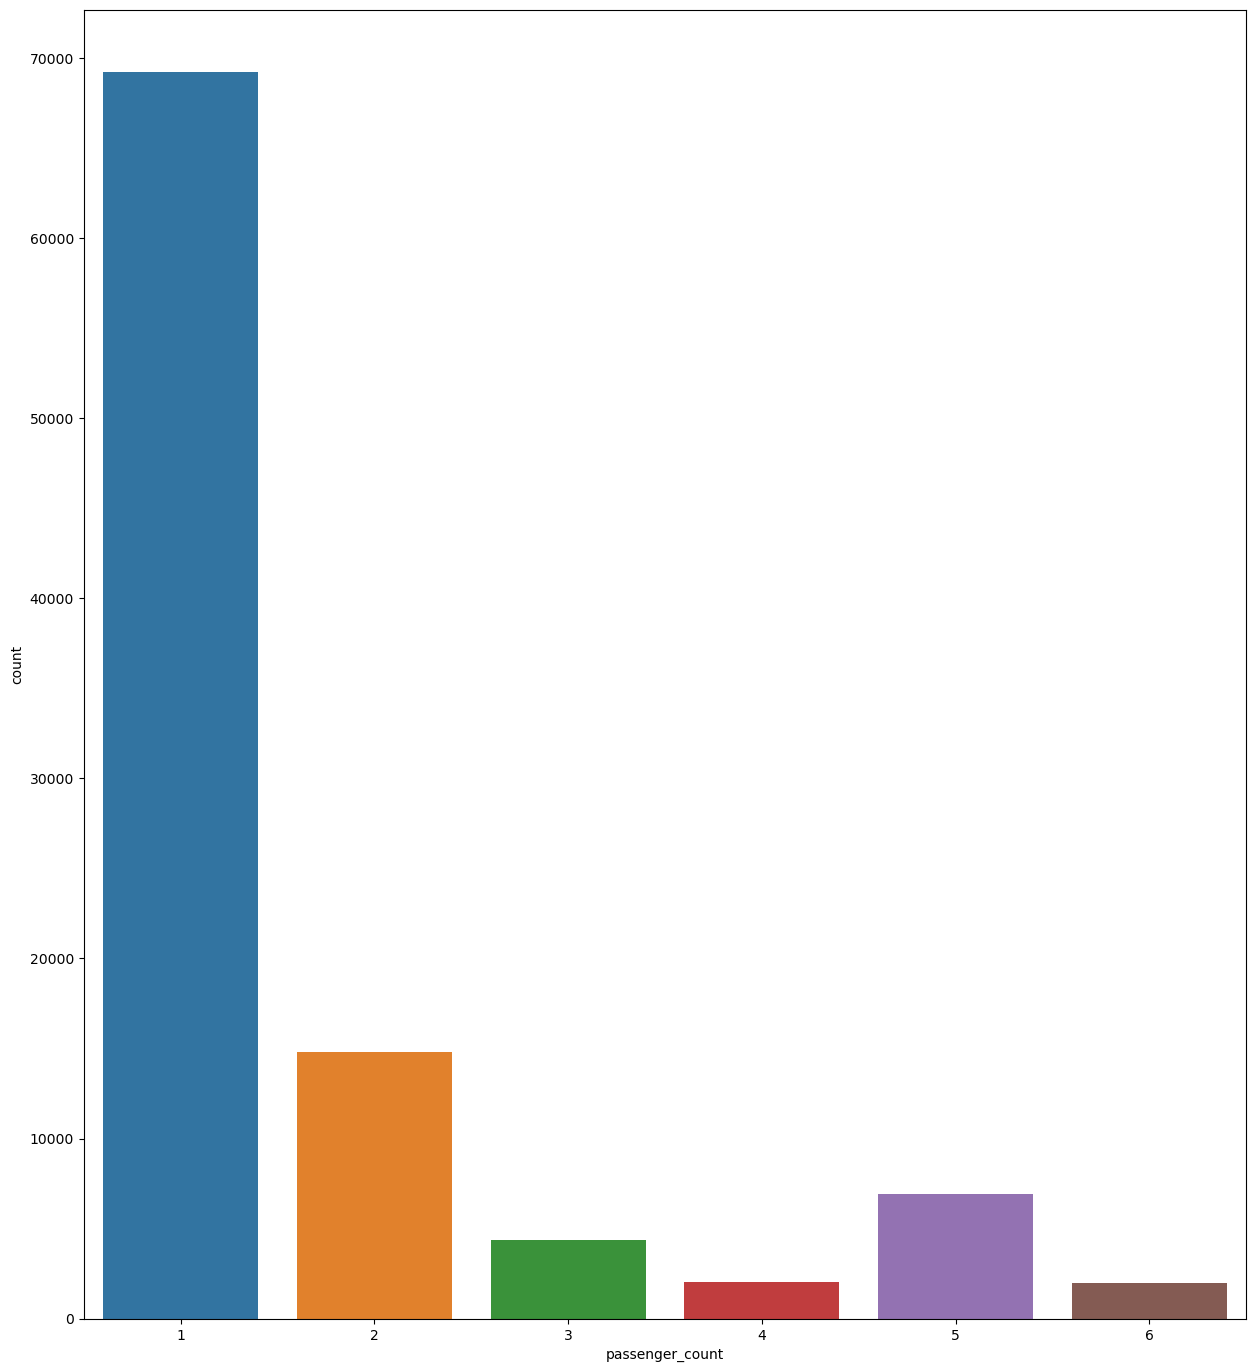

In [83]:
# Counting the number of passengers vs the number of rides
plt.figure(figsize = (15,17))
sns.countplot(x = "passenger_count", data = train)

Single and double travelling passengers are the most frequent rides taken

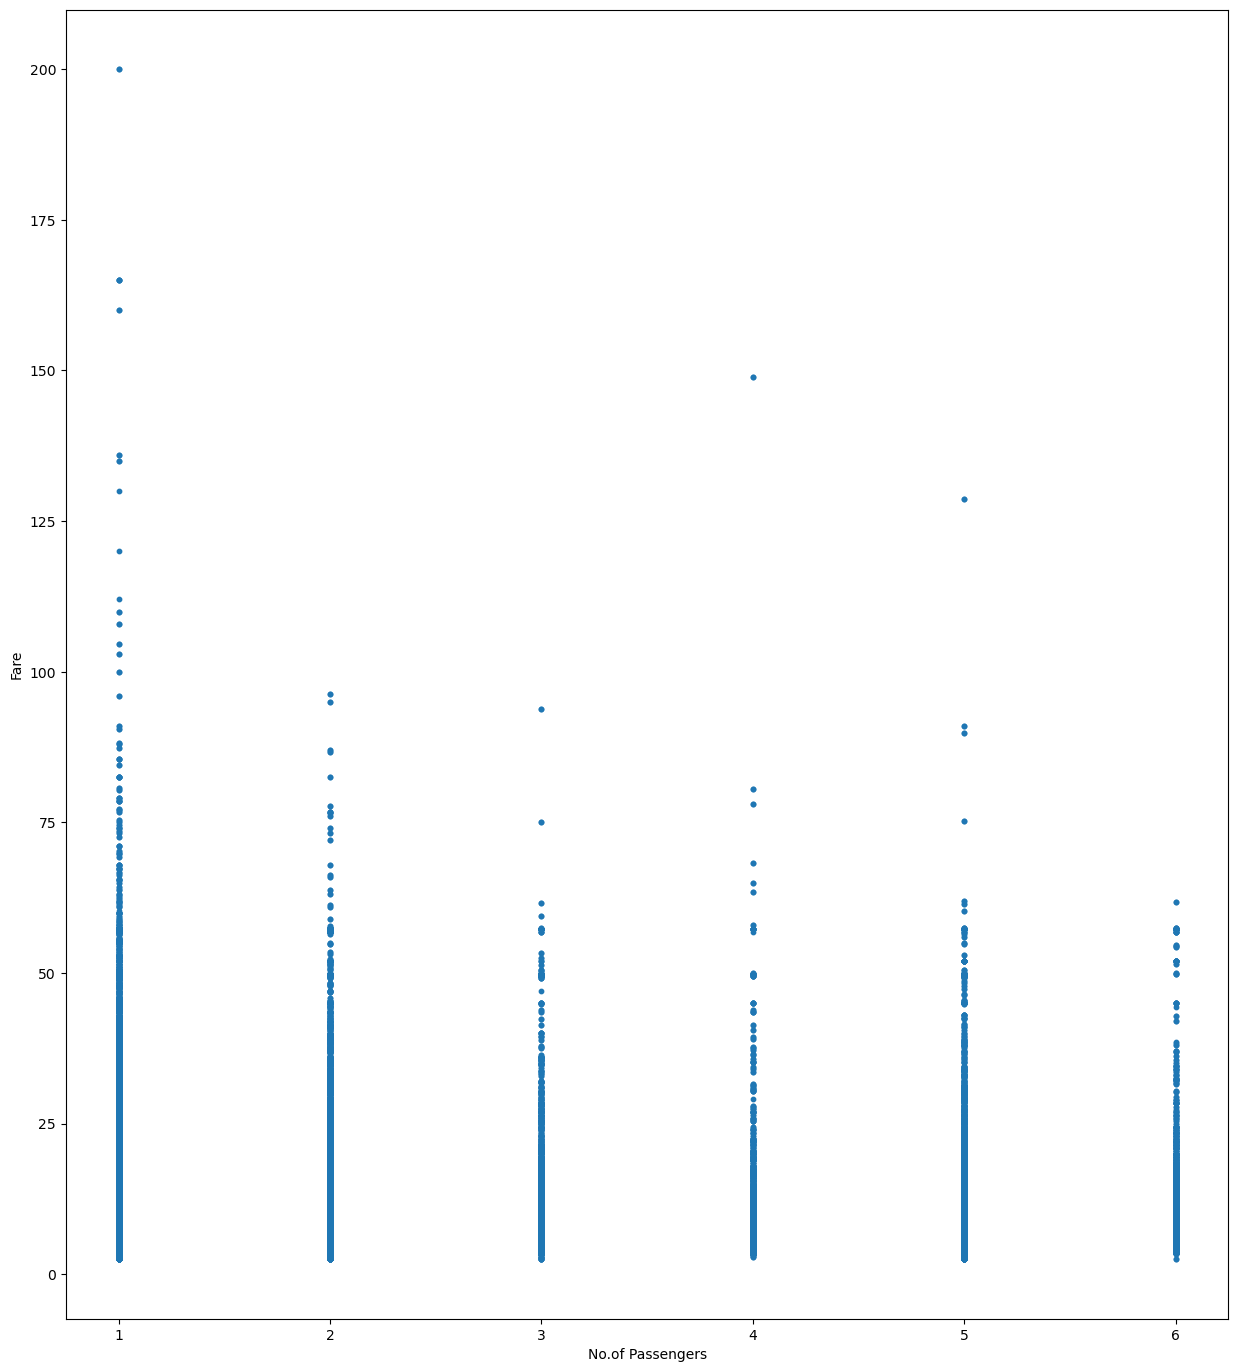

In [84]:
#Relationship between number of passengers and fare

plt.figure(figsize = (15,17))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No.of Passengers')
plt.ylabel('Fare')
plt.show()

Single and four passengers rides had the maximum fare

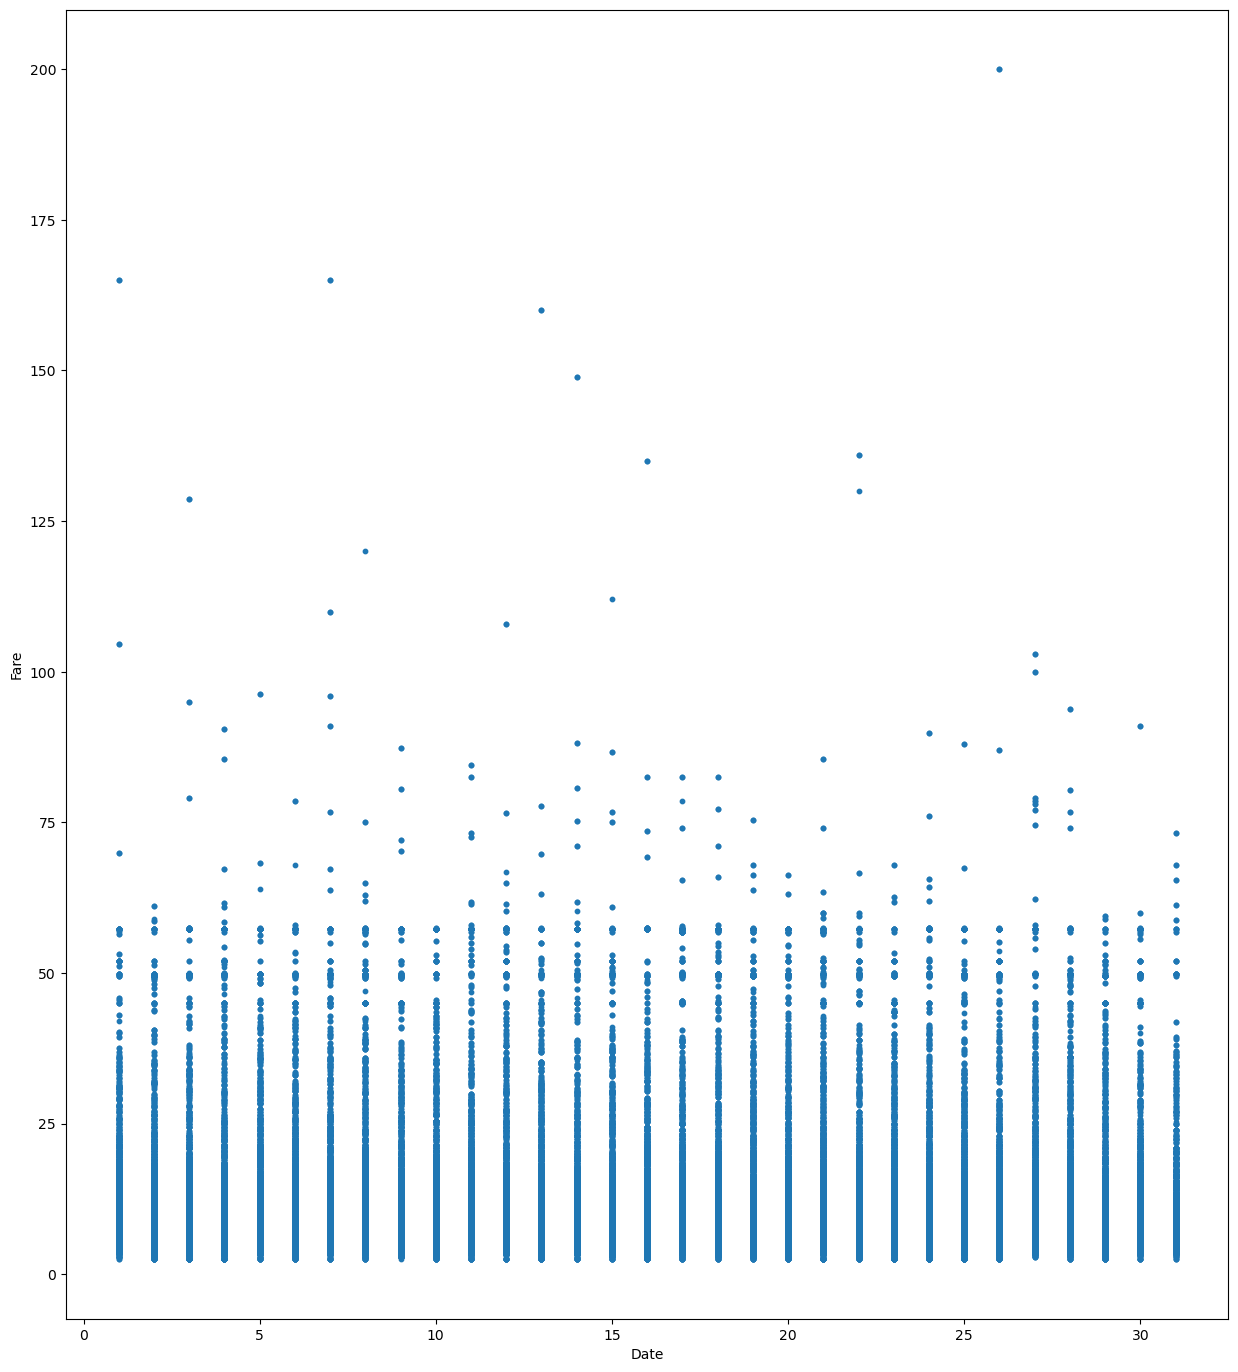

In [85]:
#Relationship between date and fare

plt.figure(figsize = (15,17))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

fare taken simillary on every day

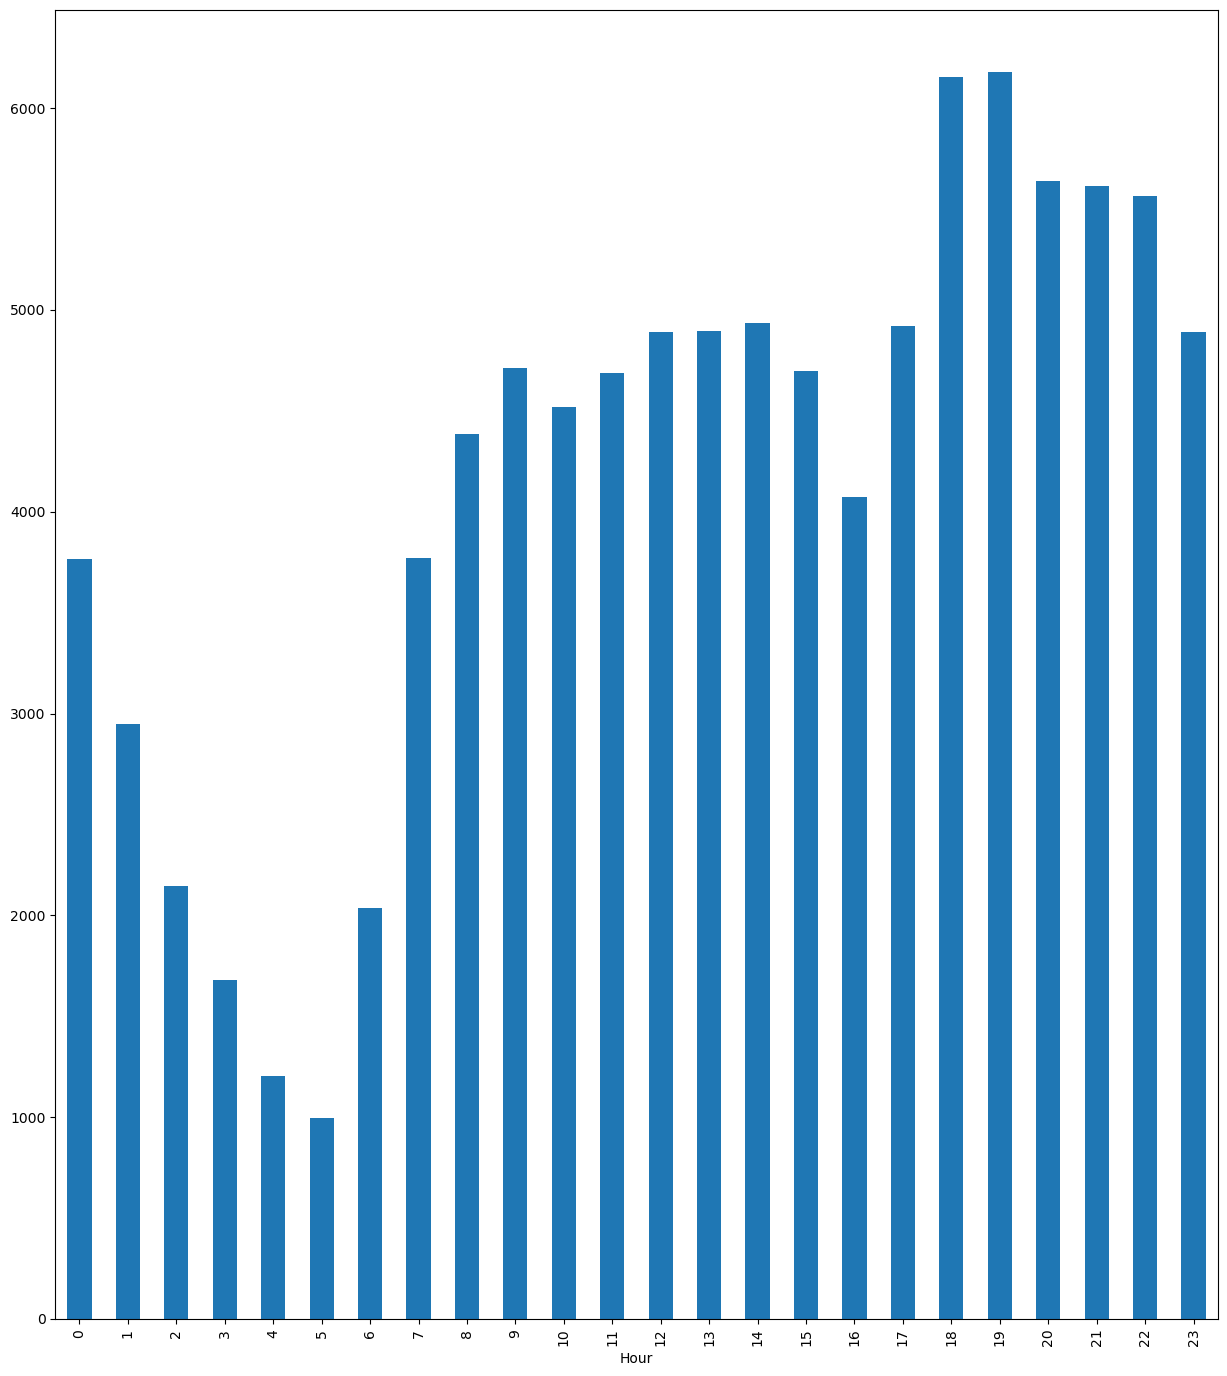

In [86]:
#relationship between the hour of the day and fare
plt.figure(figsize = (15,17))
train.groupby(train["Hour"])["Hour"].count().plot(kind = "bar")
plt.show()

Lowest number of cabs were at around 5AM and highest number of cabs were between 6PM to &7PM.

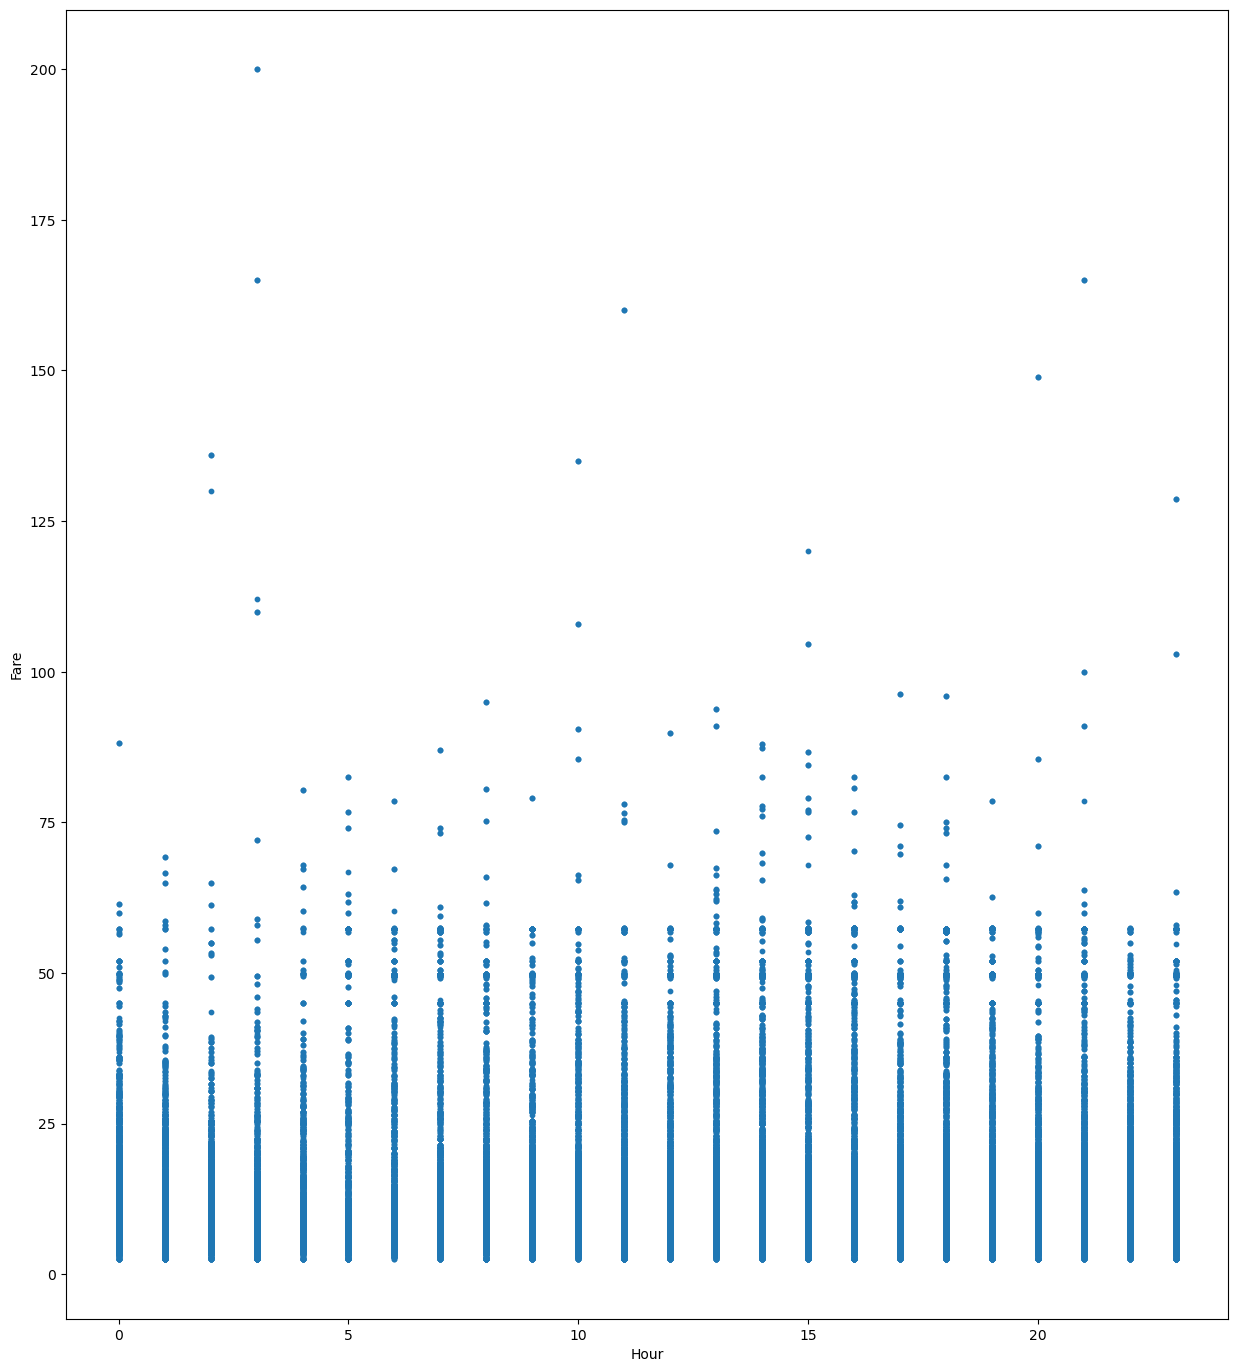

In [87]:
#Relationship between day and fare

plt.figure(figsize = (15,17))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

Fare is highest at 3Am and around 9Pm which tells the fare is highest in early morning and in the late night

<AxesSubplot:xlabel='Day', ylabel='count'>

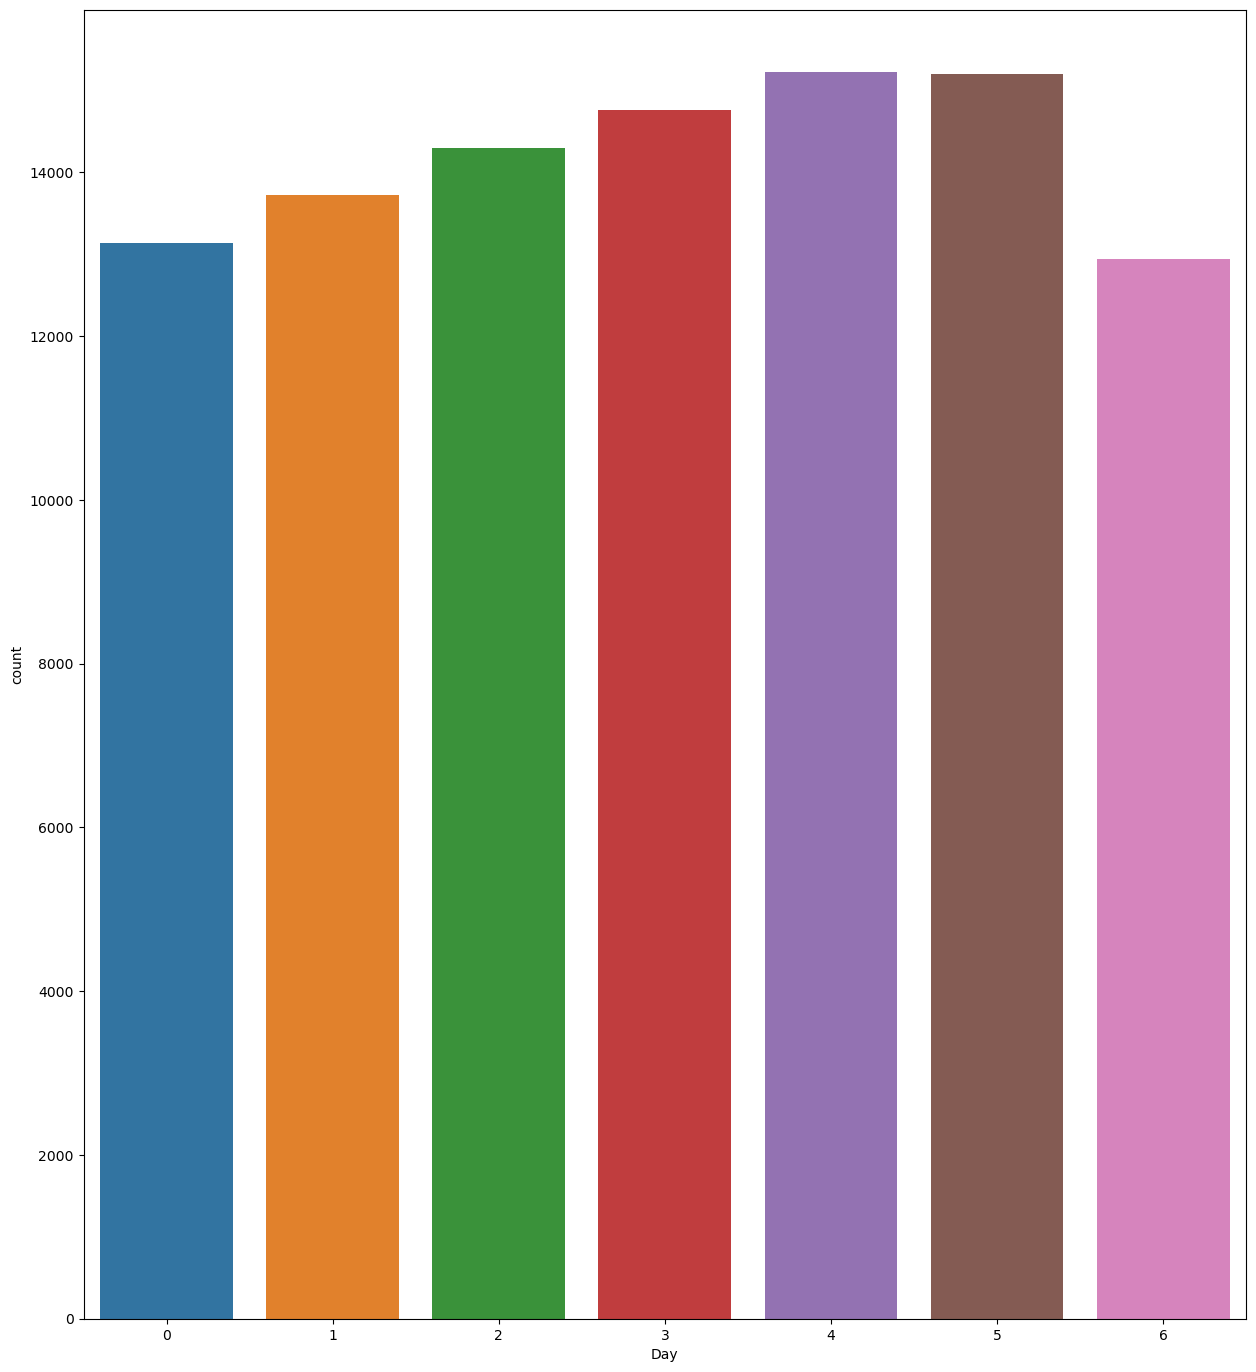

In [88]:
#relationship between the Day of the week and number of cab rides
plt.figure(figsize = (15,17))
sns.countplot(x = "Day", data = train)

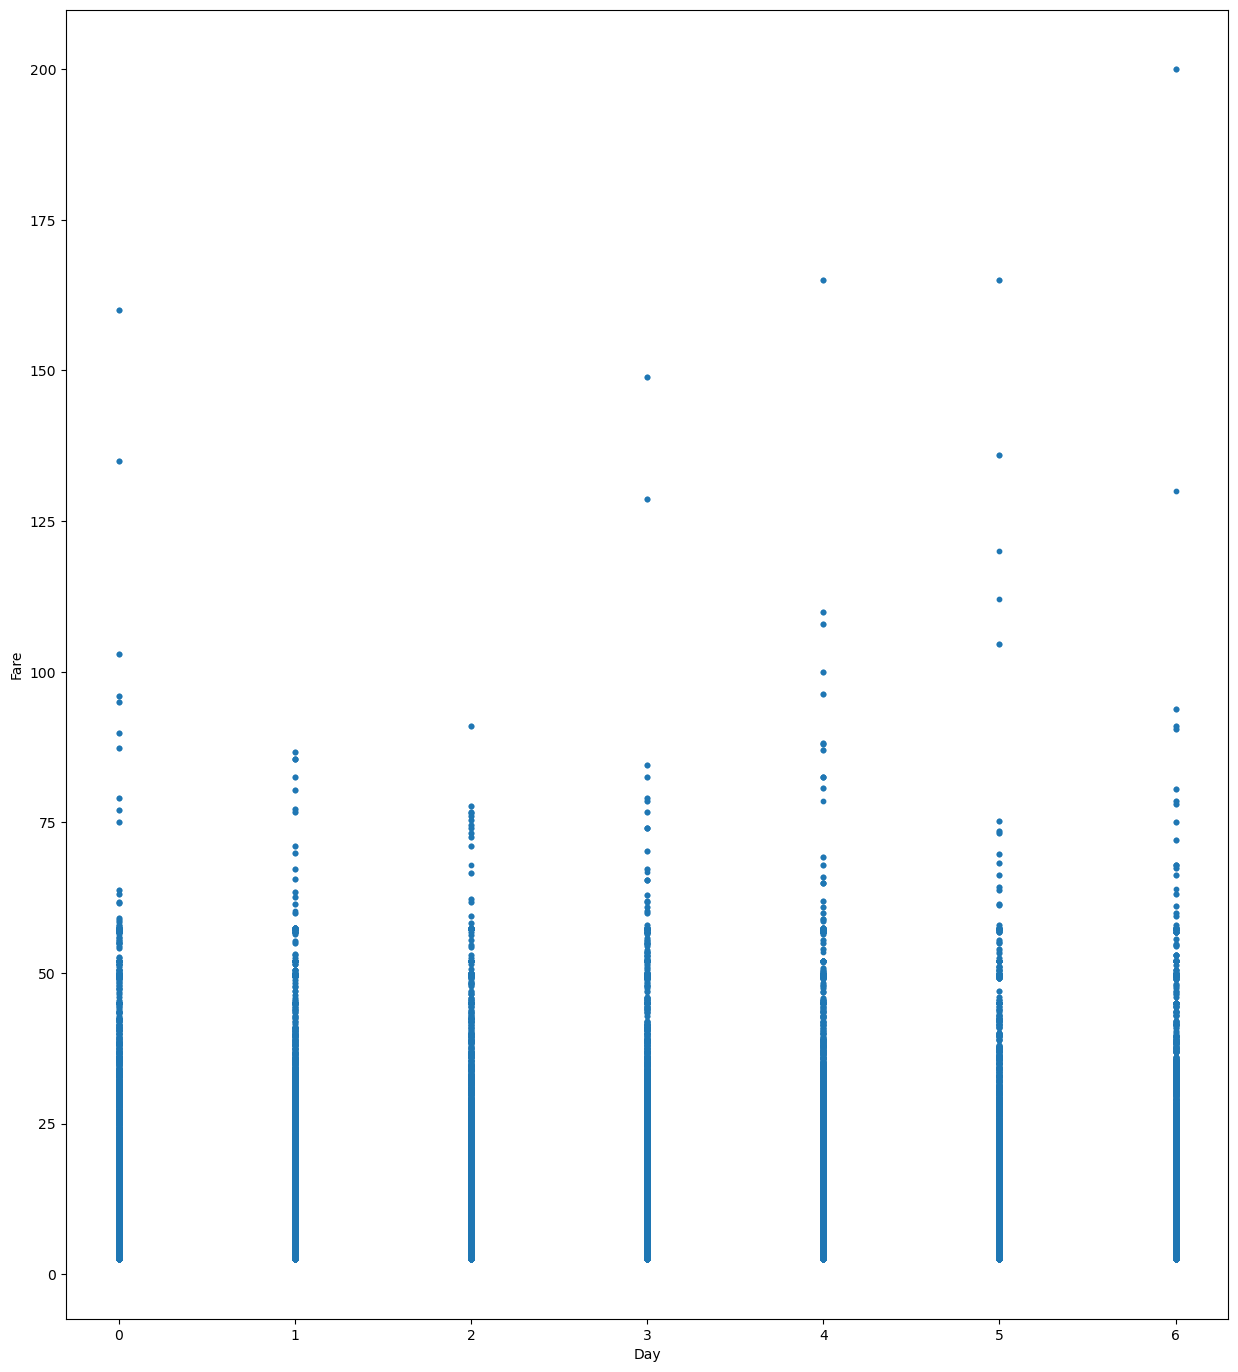

In [89]:
#Relationship between day of the week and fare

plt.figure(figsize = (15,17))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The cab fare was highest on Thursday, Friday, Saturday. While lowest on others days.

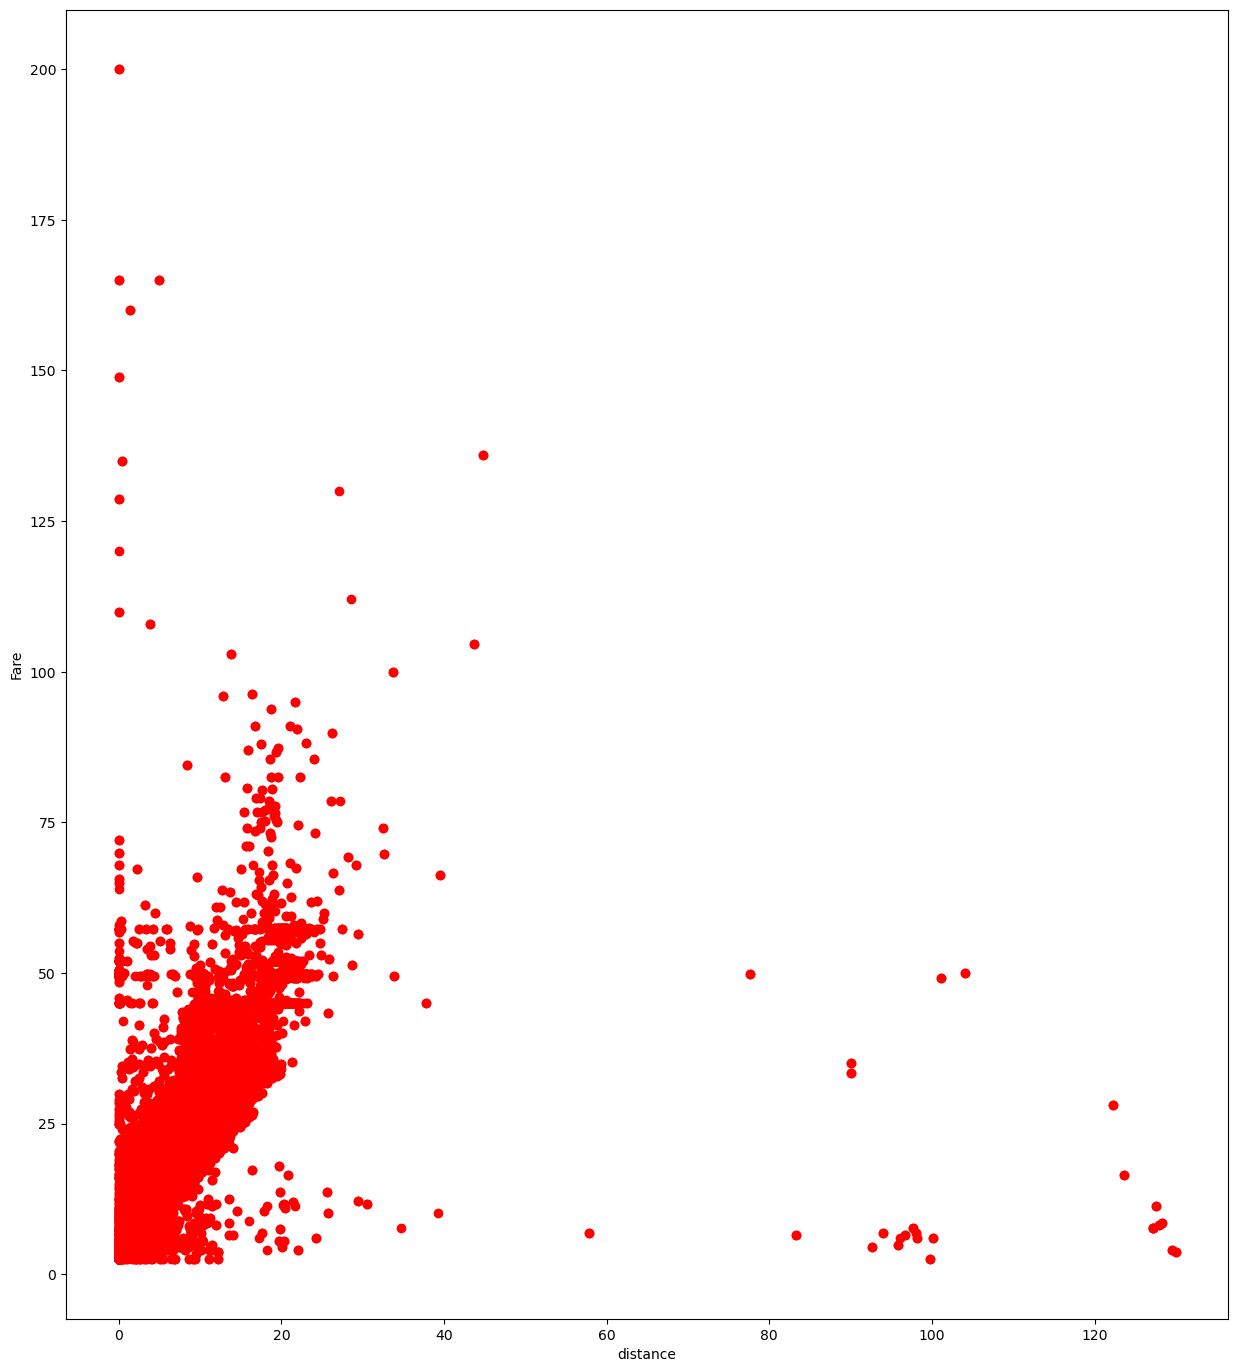

In [90]:
# relationship between Distance and fare

plt.figure(figsize = (15,17))
plt.scatter(x=train['distance'], y=train['fare_amount'], c ="r")
plt.xlabel('distance')
plt.ylabel('Fare')
plt.show()

Distance is showing directly proportional to fare charge as the distance is increasing the fare charge is also increasing 

# Featuring scaling

fare_amount


C:\Users\ASHUTOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


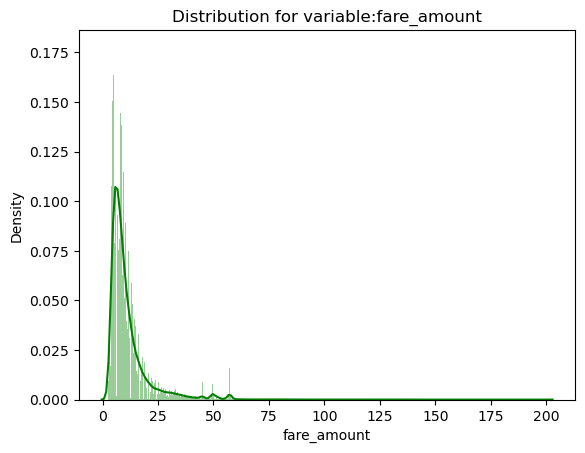

distance


C:\Users\ASHUTOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


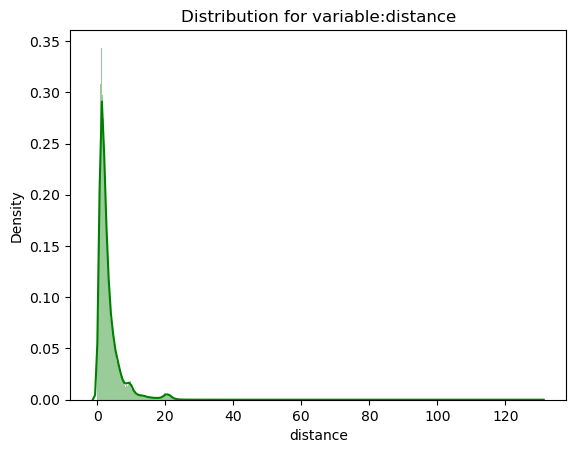

In [91]:
# Normality check for the training data for cab fare and dostance 

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins = 'auto', color = 'green')
    plt.title("Distribution for variable:"+i)
    plt.ylabel("Density")
    plt.show()

In [92]:
#since the fareamount is highly skewed applying log transformation
train['fare_amount']= np.log1p(train['fare_amount'])

#since the variable distance is highly skewed applying log transformation
train['distance']= np.log1p(train['distance'])

fare_amount


C:\Users\ASHUTOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


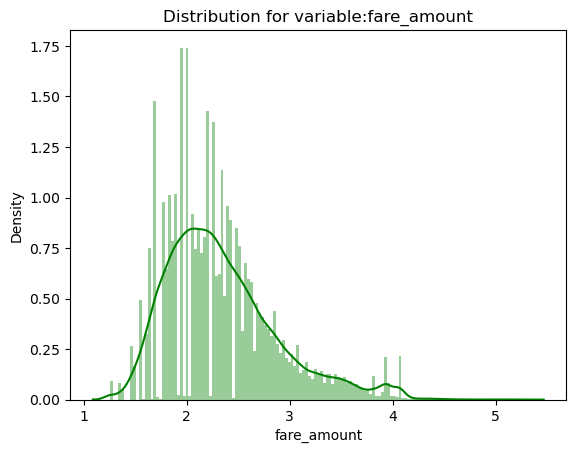

distance


C:\Users\ASHUTOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


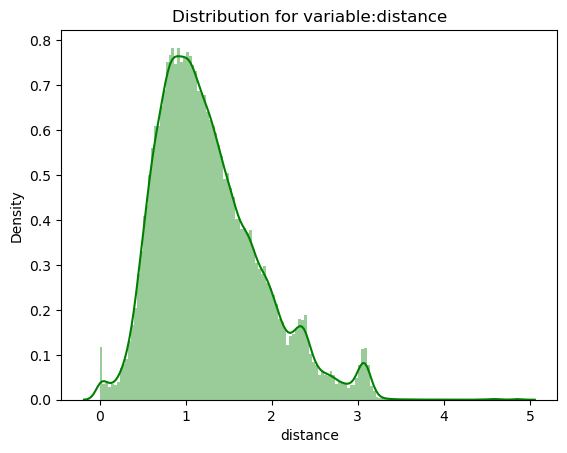

In [93]:
# Normality check for the training data for cab fare and dostance 

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins = 'auto', color = 'green')
    plt.title("Distribution for variable:"+i)
    plt.ylabel("Density")
    plt.show()

distance


C:\Users\ASHUTOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


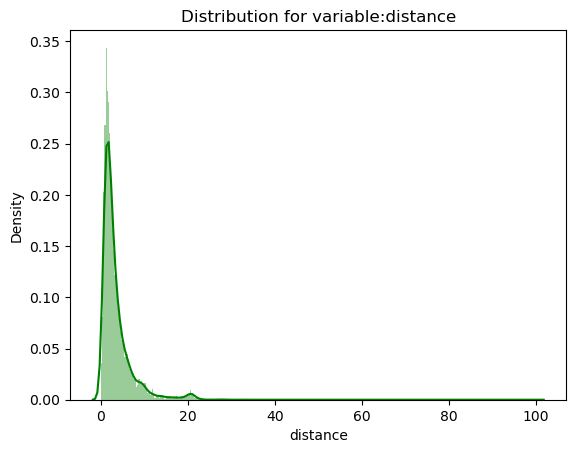

In [95]:
# Normality check for the test data for cab fare and dostance 

for i in ['distance']:
    print(i)
    sns.distplot(test[i],bins = 'auto', color = 'green')
    plt.title("Distribution for variable:"+i)
    plt.ylabel("Density")
    plt.show()

In [96]:
#since the variable distance is highly skewed applying log transformation
test['distance']= np.log1p(test['distance'])

distance


C:\Users\ASHUTOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


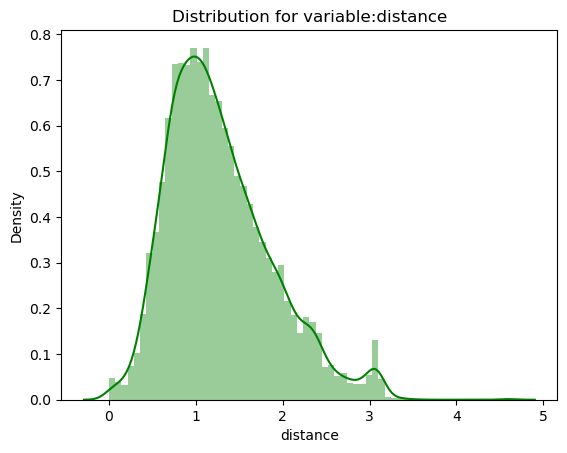

In [97]:
# Normality check for the test data for cab fare and dostance 

for i in ['distance']:
    print(i)
    sns.distplot(test[i],bins = 'auto', color = 'green')
    plt.title("Distribution for variable:"+i)
    plt.ylabel("Density")
    plt.show()

After applying log transformation the skewed data already converted into normal distribution so there is no need for standerdization and normalization. We have already got the bell curve.

# Data Modelling- Applying ML Algorithms

In [99]:
#applying train test splot on the dataset
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,train.columns!= 'fare_amount'], train.iloc[:,0], test_size=0.20, random_state=1)

In [100]:
X_train

,passenger_count,year,Month,Date,Day,Hour,distance
56314,1,2014,3,11,1,23,1.268103
66420,1,2011,6,21,1,18,0.839461
38975,2,2015,2,1,6,16,1.268838
62702,1,2010,6,24,3,12,1.034258
55326,6,2013,4,16,1,10,1.379723
...,...,...,...,...,...,...,...
51836,5,2009,4,16,3,11,0.656208
101551,1,2012,1,29,6,21,0.520883
5374,1,2010,4,13,1,21,1.561396
80445,1,2014,1,2,3,16,1.525261


In [101]:
y_train

56314     2.140066
66420     1.960095
38975     2.397895
62702     1.774952
55326     2.803360
            ...   
51836     1.960095
101551    1.547563
5374      2.332144
80445     2.674149
102060    3.378611
Name: fare_amount, Length: 79430, dtype: float64

In [102]:
print(X_train.shape)
print(X_test.shape)

(79430, 7)
(19858, 7)


In [104]:
print(y_train.shape)
print(y_test.shape)

(79430,)
(19858,)


## Linear Regresssion

In [105]:
#building model on the train dataset
fit_LR = LinearRegression().fit(X_train,y_train)

In [106]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [107]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [112]:
#Calculate RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test,pred_test_LR))

#Calculate RMSE for train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train,pred_train_LR))

In [113]:
print("The Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
print("The Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

The Root Mean Squared Error for Train data = 0.26515670538978814
The Root Mean Squared Error For Test data = 0.26650732741809996


In [114]:
#Calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train,pred_train_LR)

0.7631223655586671

In [116]:
r2_score(y_test,pred_test_LR)

0.7582014623086017

## Decison The Model

In [117]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [118]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [123]:
#Calculate RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test,pred_test_DT))

#Calculate RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_test,pred_test_DT))

In [124]:
print("The Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("The Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

The Root Mean Squared Error for Train data = 0.29529462783317356
The Root Mean Squared Error For Test data = 0.29529462783317356


In [126]:
#Calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train,pred_train_DT)

0.7072113113351701

In [127]:
r2_score(y_test,pred_test_DT)

0.7031435742887038

## Random Forest Model

In [132]:
fit_RF = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

In [133]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)

#prediction on test data
pred_test_RF = fit_RF.predict(X_test)


In [134]:
#Calculate RMSE for test data 
RMSE_test_RF = np.sqrt(mean_squared_error(y_test,pred_test_RF))

#calculate RMSE for train data 
RMSE_train_RF = np.sqrt(mean_squared_error(y_train,pred_train_RF))

In [135]:
print("The Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("The Root Mean Squared Error for Test data = "+str(RMSE_test_DT))

The Root Mean Squared Error for Train data = 0.29529462783317356
The Root Mean Squared Error for Test data = 0.29529462783317356


In [136]:
#Calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train,pred_train_RF)

0.9903157563413987

In [137]:
r2_score(y_test,pred_test_RF)

0.9279200270597552

## Gradient Boosting

In [141]:
#fitting the model on the train data
fit_GB = GradientBoostingRegressor().fit(X_train,y_train)

In [145]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [146]:
#Calculate REMS for the test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test,pred_test_GB))

#calculate RMSE for train data 
RMSE_train_GB = np.sqrt(mean_squared_error(y_train,pred_train_GB))

In [147]:
print("The Root Mean Squared Error for Train data = "+str(RMSE_train_GB))
print("The Root Mean Squared Error for Test data = "+str(RMSE_test_GB))

The Root Mean Squared Error for Train data = 0.22607303210681154
The Root Mean Squared Error for Test data = 0.2339852808872061


In [148]:
#calculate R^2 for ttrain data
from sklearn.metrics import r2_score
r2_score(y_train,pred_train_GB)

0.8278066611197539

In [149]:
r2_score(y_test,pred_test_GB)

0.8136143645058787

## Parameter Tuning

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
from pprint import pprint
#looking aT THE PARAMETERS BEING USED CURRENTLY
print("Parameters currently in use:\n")
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [159]:
## Random search Cv on Random Forest

RRF = RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

#Create the random grid
rand_grid = {'n_estimators':n_estimator,
            'max_depth':depth}

randomcv_rf = RandomizedSearchCV(RRF,param_distributions = rand_grid,n_iter =5,cv =5,random_state=0)
randomcv_RF = randomcv_rf.fit(X_train,y_train)
prediction_RRF = randomcv_RF.predict(X_test)

view_best_params_RRF =randomcv_RF.best_params_

best_model = randomcv_RF.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test,prediction_RRF)
#Calculation RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print("Random Search CV Random Forest Regressor Model Performance")
print("Beat Parameters=",view_best_params_RRF)
print('R-squared ={:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance
Beat Parameters= {'n_estimators': 15, 'max_depth': 23}
R-squared =0.92.
RMSE =  0.1543047484445915


In [160]:
#applying Random Search CV on Gradient boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
from pprint import pprint
#looking aT THE PARAMETERS BEING USED CURRENTLY
print("Parameters currently in use:\n")
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [161]:
##random Search CV on Gradient Boosting

gb = GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

#Create the random grid
rand_grid = {'n_estimators':n_estimator,
            'max_depth':depth}

randomcv_gb = RandomizedSearchCV(gb,param_distributions = rand_grid,n_iter =5,cv =5,random_state=0)
randomcv_GB = randomcv_gb.fit(X_train,y_train)
prediction_GB = randomcv_GB.predict(X_test)

view_best_params_GB =randomcv_GB.best_params_

best_model = randomcv_GB.best_estimator_

predictions_GB = best_model.predict(X_test)

#R^2
GB_r2 = r2_score(y_test,prediction_GB)
#Calculation RMSE
GB_rmse = np.sqrt(mean_squared_error(y_test,predictions_GB))

print("Random Search CV Random Forest Regressor Model Performance")
print("Beat Parameters=",view_best_params_GB)
print('R-squared ={:0.2}.'.format(GB_r2))
print('RMSE = ',GB_rmse)

Random Search CV Random Forest Regressor Model Performance
Beat Parameters= {'n_estimators': 15, 'max_depth': 23}
R-squared =0.89.
RMSE =  0.18198222579526144


In [166]:
#Grid Search Cv on Random Forest

GRF = RandomForestRegressor(random_state=0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

#Create the grid_search
grid_search = {'n_estimators':n_estimator,
            'max_depth':depth}

gridcv_rf = GridSearchCV(GRF,param_grid = grid_search,cv =5)
gridcv_RF = gridcv_rf.fit(X_train,y_train)
prediction_GRF = gridcv_RF.predict(X_test)

view_best_params_GRF =gridcv_RF.best_params_

best_model = gridcv_RF.best_estimator_

predictions_GRF = best_model.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test,prediction_GRF)
#Calculation RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print("Grid Search CV Random Forest Regressor Model Performance")
print("Beat Parameters=",view_best_params_GRF)
print('R-squared ={:0.2}.'.format(GRF_r2))
print('RMSE = ',GRF_rmse)

Grid Search CV Random Forest Regressor Model Performance
Beat Parameters= {'max_depth': 13, 'n_estimators': 19}
R-squared =0.86.
RMSE =  0.20148572831250408


In [167]:
#Grid Search Cv on Gradient Boosting

GGB = GradientBoostingRegressor(random_state=0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

#Create the grid_search
grid_search = {'n_estimators':n_estimator,
            'max_depth':depth}

gridcv_gb = GridSearchCV(GGB,param_grid = grid_search,cv =5)
gridcv_GB = gridcv_gb.fit(X_train,y_train)
prediction_GGB = gridcv_GB.predict(X_test)

view_best_params_GGB =gridcv_GB.best_params_

best_model = gridcv_GB.best_estimator_

predictions_GGB = best_model.predict(X_test)

#R^2
GGB_r2 = r2_score(y_test,prediction_GGB)
#Calculation RMSE
GGB_rmse = np.sqrt(mean_squared_error(y_test,predictions_GGB))

print("Grid Search CV Gradient Boosting Regressor Model Performance")
print("Beat Parameters=",view_best_params_GGB)
print('R-squared ={:0.2}.'.format(GGB_r2))
print('RMSE = ',GGB_rmse)

Grid Search CV Gradient Boosting Regressor Model Performance
Beat Parameters= {'max_depth': 13, 'n_estimators': 19}
R-squared =0.87.
RMSE =  0.19584397802573814


## Prediction for the test dataset

In [171]:
## Grid Search Cross Validation for Random Forest
regr = RandomForestRegressor(random_state=0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))


#Creating the grid
grid_search = {'n_estimagtors':n_estimator,
              'max_depth':depth}

#Grid-Search Cross Validation For 5 fold CV
Gridcv_rf = GridSearchCV(regr,param_grid = grid_search, cv=5)
gridcv_RF = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_RF.best_params_

#Applying model on thest data
prediction_GRF_test = gridcv_RF.predict(test)

In [172]:
prediction_GRF_test

array([2.46620845, 2.4867804 , 1.7197039 , ..., 4.00682831, 3.17913798,
       1.92075828])

In [173]:
test['Predicted_Fare'] = prediction_GRF_test

In [174]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_Fare
0,1,2015,1,27,1,13,1.200946,2.466208
1,1,2015,1,27,1,13,1.231205,2.486780
2,1,2011,10,8,5,11,0.481579,1.719704
3,1,2012,12,1,5,21,1.085538,2.230946
4,1,2012,12,1,5,21,1.854312,2.949115


In [175]:
test.to_csv('test_cf.csv')